# HZG NIR image: dithered 画像作成 (旧版・川端版)

2022/08/04 H. Akitaya (PERC/CIT)

In [25]:
import os
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import Cutout2D

In [26]:
# ファイル名定義
BASE_DIR = './'
MODEL_DIR = 'model_fits'  # Model image directory.
DITHER_DIR = 'dither_fits'
FN_HEADER = "uvissim4_"  # Model image filename header.

In [27]:
# band name definition.
BANDS = ['o', 'j', 'h', 'k']

In [33]:
# Dithering pattern.
DITHERS = [(499, 499), (509, 509), (509, 489), (489, 489), (489, 509)]
# Output image size.
IMGSIZE = (979, 979)

In [34]:
# Reference.
# https://github.com/astropy/photutils/issues/338

In [35]:
# Check for output image directory.
modeldir_fullpath = os.path.join(BASE_DIR, DITHER_DIR)
if os.path.exists(modeldir_fullpath):
    if not os.path.isdir(modeldir_fullpath):
        raise FileExistsError
    print('Directory {} exists. Skip.'.format(modeldir_fullpath))
else:
    print('Directory {} created.'.format(modeldir_fullpath))
    os.mkdir(modeldir_fullpath)

Directory ./dither_fits exists. Skip.


## Create dithered images.

In [36]:
for band in BANDS:
    for i in range(len(DITHERS)):
        fn_in = os.path.join(BASE_DIR, MODEL_DIR, '{:s}{:1s}{:1s}.fits'.format(FN_HEADER, band, str(i+1)))
        fn_out = os.path.join(BASE_DIR, DITHER_DIR, '{:s}{:1s}{:1s}_dthr.fits'.format(FN_HEADER, band, str(i+1)))
        print('Processing {}, {}, band={}, no={}'.format(fn_in, fn_out, band, i+1))
        img = fits.open(fn_in)
        wcs = WCS(img[0].header)
        cutout = Cutout2D(img[0].data, DITHERS[i], IMGSIZE, wcs=wcs)
        img[0].data = cutout.data
        img[0].header['CRPIX1'] = cutout.wcs.wcs.crpix[0]
        img[0].header['CRPIX2'] = cutout.wcs.wcs.crpix[1]
        img[0].header['RA'] = (150.45190188077547, 'Degree')
        img[0].header['DEC'] = (1.9017844430059843, 'Degree')
        img[0].header['FILTER'] = (band, 'Filter')
        img[0].header['DITHER'] = (i+1, 'Dither')
        img.writeto(fn_out, overwrite=True)
        img.close()

Processing ./model_fits/uvissim4_o1.fits, ./dither_fits/uvissim4_o1_dthr.fits, band=o, no=1
Processing ./model_fits/uvissim4_o2.fits, ./dither_fits/uvissim4_o2_dthr.fits, band=o, no=2
Processing ./model_fits/uvissim4_o3.fits, ./dither_fits/uvissim4_o3_dthr.fits, band=o, no=3
Processing ./model_fits/uvissim4_o4.fits, ./dither_fits/uvissim4_o4_dthr.fits, band=o, no=4
Processing ./model_fits/uvissim4_o5.fits, ./dither_fits/uvissim4_o5_dthr.fits, band=o, no=5
Processing ./model_fits/uvissim4_j1.fits, ./dither_fits/uvissim4_j1_dthr.fits, band=j, no=1
Processing ./model_fits/uvissim4_j2.fits, ./dither_fits/uvissim4_j2_dthr.fits, band=j, no=2
Processing ./model_fits/uvissim4_j3.fits, ./dither_fits/uvissim4_j3_dthr.fits, band=j, no=3
Processing ./model_fits/uvissim4_j4.fits, ./dither_fits/uvissim4_j4_dthr.fits, band=j, no=4
Processing ./model_fits/uvissim4_j5.fits, ./dither_fits/uvissim4_j5_dthr.fits, band=j, no=5
Processing ./model_fits/uvissim4_h1.fits, ./dither_fits/uvissim4_h1_dthr.fits, b

In [43]:
import glob
glob.glob(os.path.join(BASE_DIR, DITHER_DIR, '*.fits'))

['./dither_fits/uvissim4_o1_dthr.fits',
 './dither_fits/uvissim4_o2_dthr.fits',
 './dither_fits/uvissim4_o3_dthr.fits',
 './dither_fits/uvissim4_o4_dthr.fits',
 './dither_fits/uvissim4_o5_dthr.fits',
 './dither_fits/uvissim4_j1_dthr.fits',
 './dither_fits/uvissim4_j2_dthr.fits',
 './dither_fits/uvissim4_j3_dthr.fits',
 './dither_fits/uvissim4_j4_dthr.fits',
 './dither_fits/uvissim4_j5_dthr.fits',
 './dither_fits/uvissim4_h1_dthr.fits',
 './dither_fits/uvissim4_h2_dthr.fits',
 './dither_fits/uvissim4_h3_dthr.fits',
 './dither_fits/uvissim4_h4_dthr.fits',
 './dither_fits/uvissim4_h5_dthr.fits',
 './dither_fits/uvissim4_k1_dthr.fits',
 './dither_fits/uvissim4_k2_dthr.fits',
 './dither_fits/uvissim4_k3_dthr.fits',
 './dither_fits/uvissim4_k4_dthr.fits',
 './dither_fits/uvissim4_k5_dthr.fits']

In [45]:
import matplotlib.pyplot as plt

In [49]:
fts = fits.open('dither_fits/uvissim4_h1_dthr.fits')

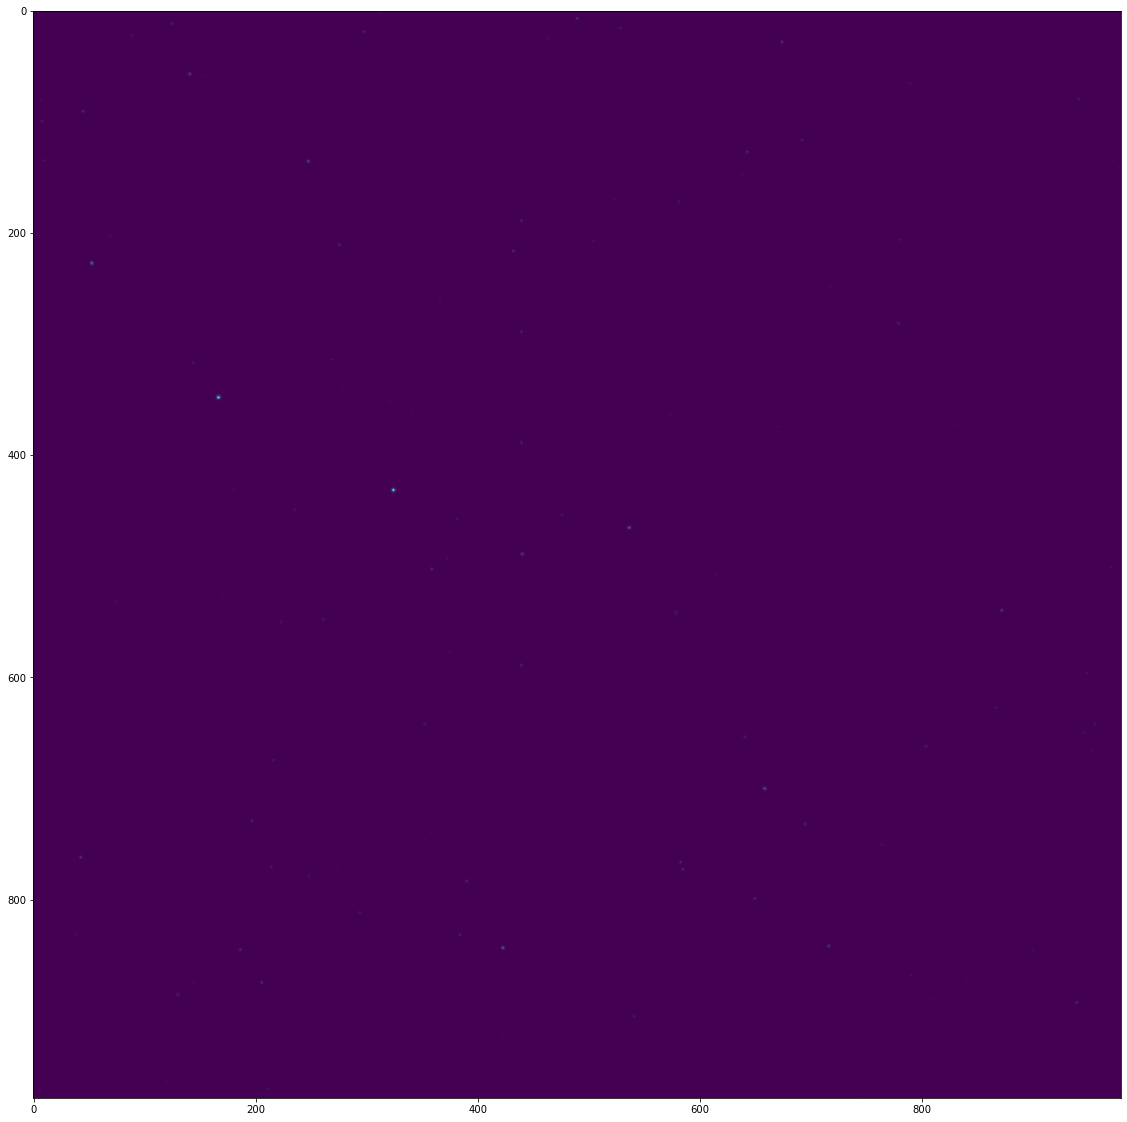

In [57]:
plt.figure(figsize=(20,20))
plt.imshow(fts[0].data)